In [1]:
import apss_lib
import numpy as np
%matplotlib inline
apss_lib.verbose = False

2020-04-29 09:47:07.298416


In [2]:
solini = 0 ; solsol = 400 ; ttinter = [[11,15]]
ttinter = [[12,13]]
ttinter = [[12,14]]
ttinter = [[11,13]]
ttinter = [[10,15]]
ttinter = [[11,14]]

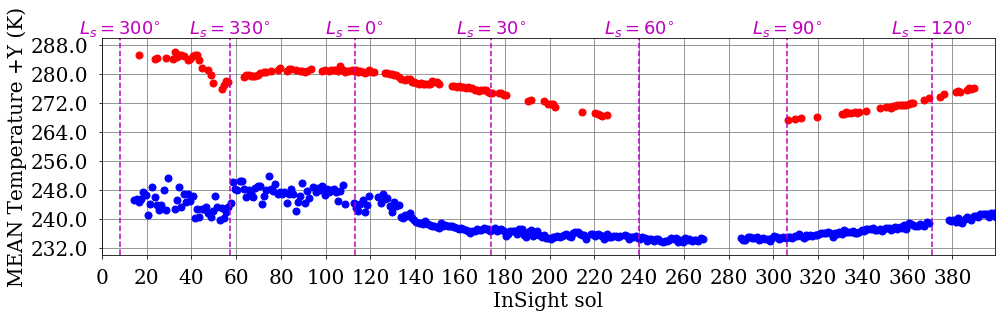

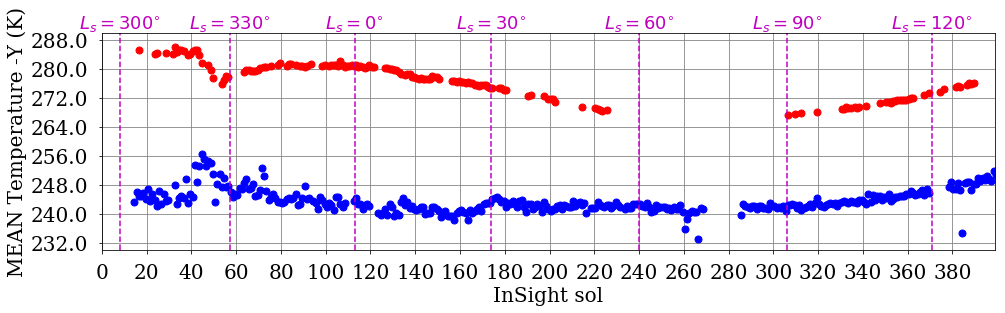

In [3]:
datext = "tsurf_bins_LT_%i_%i.txt"%(ttinter[0][0],ttinter[0][1])
pat,patx = apss_lib.multisol(pds=True,solini=solini,solsol=solsol,code="PAT",ttinter=ttinter,\
                        timetype="LTST",\
                        compute="mean",ymin=230,ymax=290,\
                        addls=True,addlspos=1.008,\
                        fmt="%.1f",marker="o",nxticks=20,facselec=0.95,\
                        addtxt=datext)
mat,matx = apss_lib.multisol(pds=True,solini=solini,solsol=solsol,code="MAT",ttinter=ttinter,\
                        timetype="LTST",\
                        compute="mean",ymin=230,ymax=290,\
                        addls=True,addlspos=1.008,\
                        fmt="%.1f",marker="o",nxticks=20,facselec=0.95,\
                        addtxt=datext)

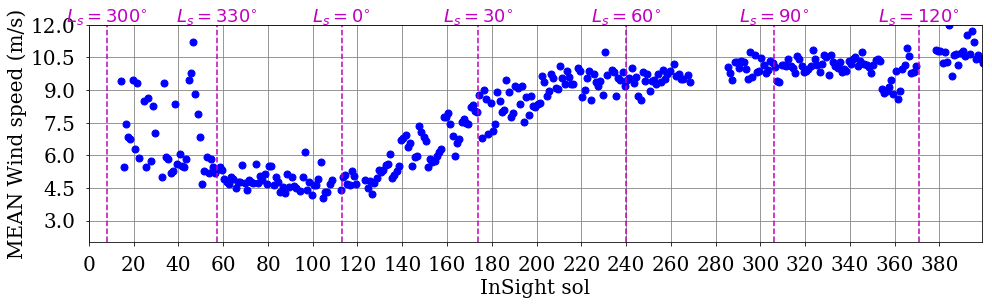

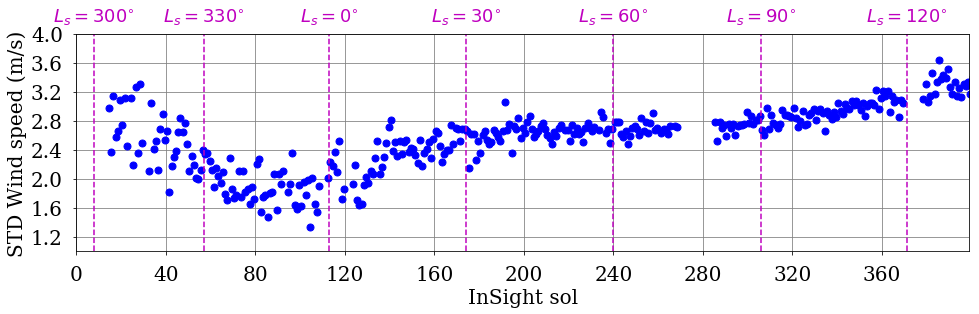

In [4]:
hws,hwsx = apss_lib.multisol(pds=True,solini=solini,solsol=solsol,code="HWS",ttinter=ttinter,\
                        timetype="LTST",\
                        compute="mean",ymin=2,ymax=12,\
                        addls=True,addlspos=1.03,\
                        fmt="%.1f",marker="o",nxticks=20,facselec=0.95)
hwsstd,hwsstdx = apss_lib.multisol(pds=True,solini=solini,solsol=solsol,code="HWS",ttinter=ttinter,\
                        timetype="LTST",\
                        compute="std",ymin=1,ymax=4,\
                        addls=True,addlspos=1.06,\
                        fmt="%.1f",marker="o",nxticks=11,facselec=0.95)

In [5]:
#pres,presx = apss_lib.multisol(pds=True,solini=solini,solsol=solsol,code="PRE",ttinter=ttinter,\
#                        timetype="LTST",\
#                        compute="mean",ymin=600,ymax=800,\
#                        addls=True,addlspos=1.03,\
#                        fmt="%.1f",marker="o",nxticks=20,facselec=0.95)

In [6]:
datext = "tsurf_bins_LT_%i_%i.txt"%(ttinter[0][0],ttinter[0][1])
solts,tsurfts = np.loadtxt(datext,unpack=True)

temp = 0.5*(mat+pat)
temp = np.minimum(mat,pat)

foo,sols  = np.modf(solts)
foo,sola  = np.modf(patx)
foo,solw  = np.modf(hwsx)
dasol     = np.array([])
dat_s     = np.array([])
datsa     = np.array([])
datsam    = np.array([])
datsap    = np.array([])
dahws     = np.array([])
dahwsstd  = np.array([])
dahwsstdn = np.array([])
daflux    = np.array([])
for sol in sols:
    tatm  = temp[sola == sol]
    tatmm = mat[sola == sol]
    tatmp = pat[sola == sol]
    tsur  = tsurfts[sols == sol]
    ws    = hws[solw == sol]
    wsstd = hwsstd[solw == sol]
    if len(tatm) > 0 and len(ws) > 0:
        dasol     = np.append(dasol,sol)
        dat_s     = np.append(dat_s,tsur)
        datsa     = np.append(datsa,tsur-tatm)
        datsam    = np.append(datsam,tsur-tatmm)
        datsap    = np.append(datsap,tsur-tatmp)
        dahws     = np.append(dahws,ws)
        dahwsstd  = np.append(dahwsstd,wsstd)
        dahwsstdn = np.append(dahwsstdn,wsstd/ws)
        daflux    = np.append(daflux,ws*(tsur-tatm))

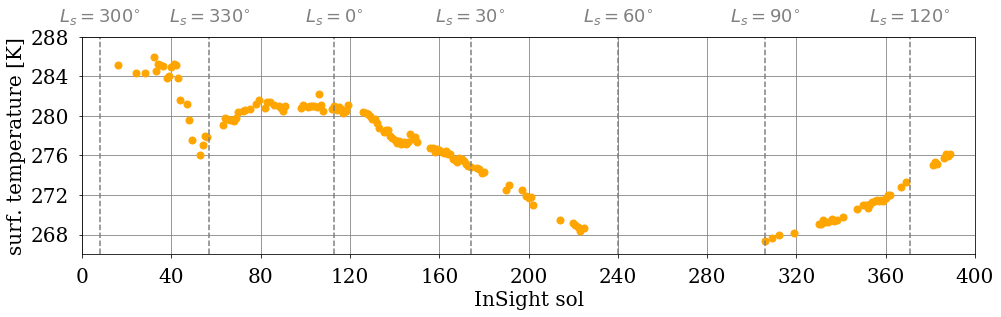

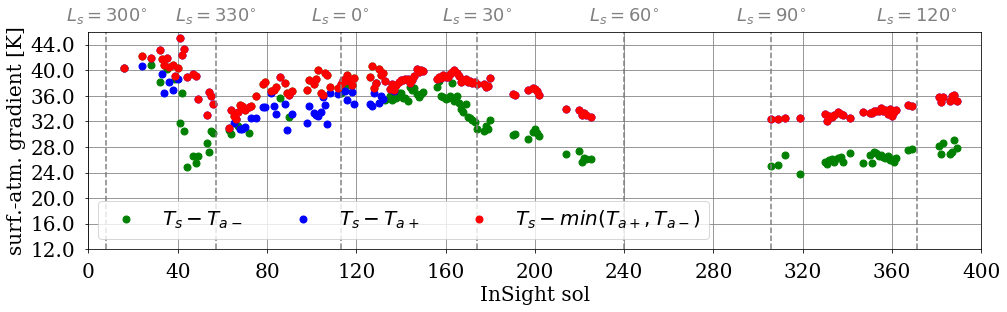

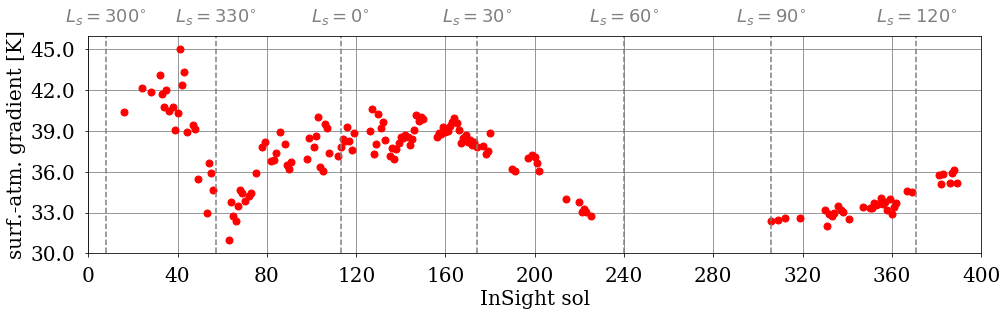

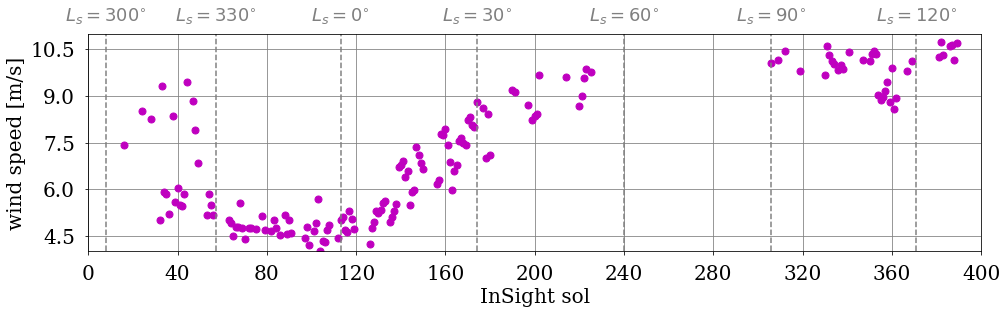

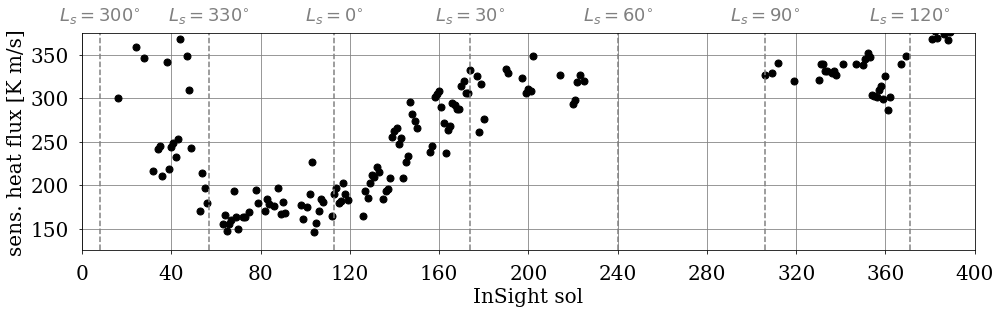

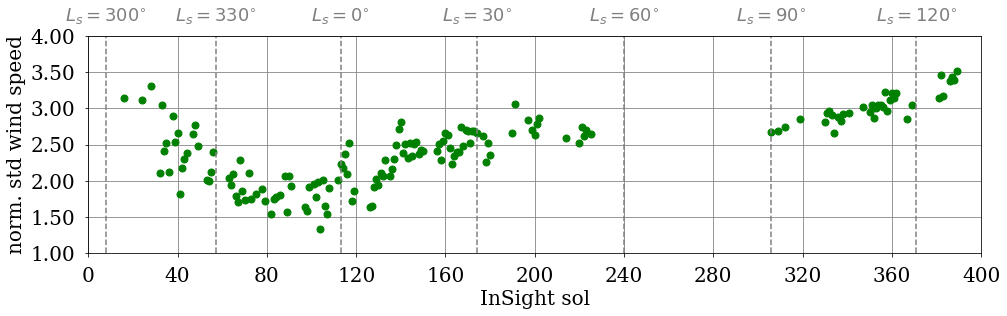

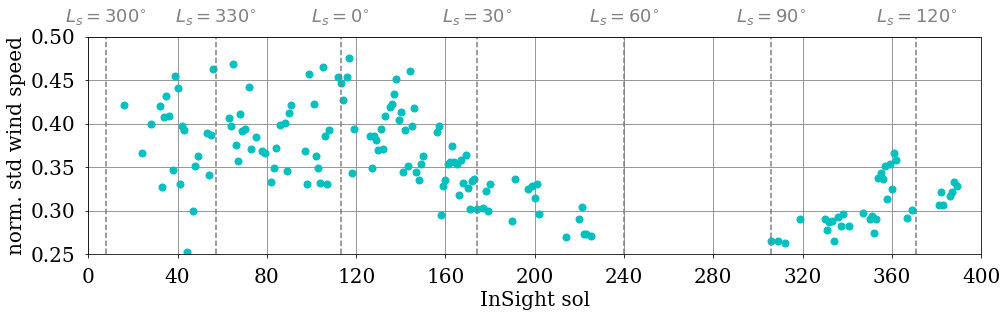

In [7]:
import ppplot
import matplotlib.pyplot as mpl
ppplot.changefont(20)
ppplot.changemarkersize(7)

fig = ppplot.figuref(x=16,y=4)
pl = ppplot.plot1d(fig=fig)
pl.f, pl.x = dat_s, dasol
pl.color = "orange"
pl.linestyle = "" 
pl.marker = "o"
pl.ylabel = "surf. temperature [K]"
pl.xlabel = "InSight sol"
pl.xmin = solini
pl.xmax = solini+solsol
pl.ymin = 266 #266
pl.ymax = 288 #286
pl.nyticks = 6 #12
pl.make()
apss_lib.axisls(pl,addlspos=1.007,col="grey")
ppplot.save(mode="pdf",filename="paper_TSURF")

fig = ppplot.figuref(x=16,y=4)
pl = ppplot.plot1d(fig=fig)
pl.fmt = "%.1f"
pl.linestyle = "" 
pl.marker = "o"
pl.ylabel = "surf.-atm. gradient [K]"
pl.xlabel = "InSight sol"
pl.xmin = solini
pl.xmax = solini+solsol
pl.ymin = 12
pl.ymax = 46
pl.f, pl.x = datsam, dasol
pl.color = "g"
pl.legend = "$T_{s} - T_{a-}$"
pl.make()
pl.f, pl.x = datsap, dasol
pl.color = "b"
pl.legend = "$T_{s} - T_{a+}$"
pl.make()
pl.f, pl.x = datsa, dasol
pl.color = "r"
pl.legend = "$T_{s} - min(T_{a+},T_{a-})$"
pl.make()
pl.ax.legend(loc="lower left", ncol=3)
apss_lib.axisls(pl,addlspos=1.05,col="grey")
ppplot.save(mode="pdf",filename="paper_SAG_detailed")

fig = ppplot.figuref(x=16,y=4)
pl = ppplot.plot1d(fig=fig)
pl.fmt = "%.1f"
pl.linestyle = "" 
pl.marker = "o"
pl.ylabel = "surf.-atm. gradient [K]"
pl.xlabel = "InSight sol"
pl.xmin = solini
pl.xmax = solini+solsol
pl.ymin = 30 #26
pl.ymax = 46 #40
pl.nyticks = 6 #13
pl.f, pl.x = datsa, dasol
pl.color = "r"
pl.make()
apss_lib.axisls(pl,addlspos=1.03,col="grey")
ppplot.save(mode="pdf",filename="paper_SAG")

fig = ppplot.figuref(x=16,y=4)
pl = ppplot.plot1d(fig=fig)
pl.fmt = "%.1f"
pl.f, pl.x = dahws, dasol
pl.color = "m"
pl.linestyle = "" 
pl.marker = "o"
pl.ylabel = "wind speed [m/s]"
pl.xlabel = "InSight sol"
pl.xmin = solini
pl.xmax = solini+solsol
pl.ymin = 4
pl.ymax = 11
pl.nyticks = 6
pl.make()
apss_lib.axisls(pl,addlspos=1.05,col="grey")
ppplot.save(mode="pdf",filename="paper_HWS")

fig = ppplot.figuref(x=16,y=4)
pl = ppplot.plot1d(fig=fig)
pl.f, pl.x = daflux, dasol
pl.color = "k"
pl.linestyle = "" 
pl.marker = "o"
pl.ylabel = "sens. heat flux [K m/s]"
pl.xlabel = "InSight sol"
pl.xmin = solini
pl.xmax = solini+solsol
pl.ymin = 125 #120
pl.ymax = 375 #370
pl.nyticks = 6
pl.make()  
apss_lib.axisls(pl,addlspos=1.05,col="grey")
ppplot.save(mode="pdf",filename="paper_SHF")

fig = ppplot.figuref(x=16,y=4)
pl = ppplot.plot1d(fig=fig)
pl.f, pl.x = dahwsstd, dasol
pl.fmt = "%.2f"
pl.color = "g"
pl.linestyle = "" 
pl.marker = "o"
pl.ylabel = "norm. std wind speed"
pl.xlabel = "InSight sol"
pl.xmin = solini
pl.xmax = solini+solsol
pl.ymin = 1
pl.ymax = 4
pl.nyticks = 6
pl.make()  
apss_lib.axisls(pl,addlspos=1.065,col="grey")
ppplot.save(mode="pdf",filename="paper_STW")

fig = ppplot.figuref(x=16,y=4)
pl = ppplot.plot1d(fig=fig)
pl.f, pl.x = dahwsstdn, dasol
pl.fmt = "%.2f"
pl.color = "c"
pl.linestyle = "" 
pl.marker = "o"
pl.ylabel = "norm. std wind speed"
pl.xlabel = "InSight sol"
pl.xmin = solini
pl.xmax = solini+solsol
pl.ymin = 0.25
pl.ymax = 0.50
pl.nyticks = 6
pl.make()  
apss_lib.axisls(pl,addlspos=1.045,col="grey")
ppplot.save(mode="pdf",filename="paper_STWN")